In [1]:
from copy import deepcopy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt 

In [3]:
pt.style.use('ggplot')

In [4]:
%matplotlib inline

In [73]:
data = pd.read_csv('./xclara.csv')
# data = pd.read_csv('/Users/jatinanand/Documents/23AttributeSoil/Raw date 294 samples-Table 1.csv')

In [74]:
print(data.shape)
data.head()


(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [7]:
f1 = data['V1'].values
f2 = data['V2'].values

In [8]:
f1

array([ 2.072345, 17.93671 ,  1.083576, ..., 64.46532 , 90.72282 ,
       64.87976 ])

In [9]:
f2

array([ -3.241693,  15.78481 ,   7.319176, ..., -10.50136 , -12.25584 ,
       -24.87731 ])

In [10]:
A = np.array(list(zip(f1,f2)))

In [11]:
A

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [12]:
pt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

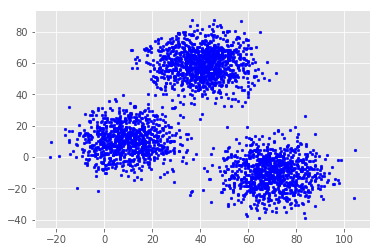

In [16]:
pt.scatter(f1,f2,c='blue',s=7)

In [18]:
len(A)

3000

In [42]:
# Equidean distance
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [43]:
# Number of cluster 
k=3
# select randamly 3 centroid 
CX = np.random.randint(0,np.max(A)-20,size=k)
CY = np.random.randint(0,np.max(A)-20,size=k)
C = np.array(list(zip(CX,CY)),dtype=np.float32)

In [44]:
C

array([[12., 44.],
       [38., 40.],
       [62., 76.]], dtype=float32)

In [45]:
pt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

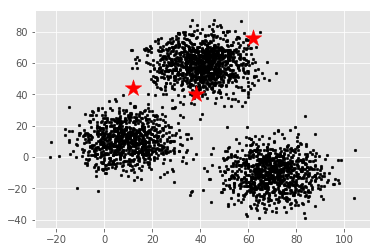

In [46]:
pt.scatter(f1,f2,c='black',s=7)
pt.scatter(CX,CY,marker='*',s=300,c='r')

In [47]:
C.shape


(3, 2)

In [48]:
C_old = np.zeros(C.shape)

In [49]:
C_old


array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [50]:
clusters = np.zeros(len(A))

In [51]:
clusters

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
# np.linalg.norm(2,3,None)
Errors = dist(C,C_old,None)

In [58]:
Errors

121.42487389328431

In [61]:
while Errors!=0:
    for i in range(len(A)):
        Distance = dist(A[i],C)
        Cluster = np.argmin(Distance)
        clusters[i]=Cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [A[j] for j in range(len(A)) if clusters[j]==i]
        C[i]= np.mean(points,axis=0)
    Errors = dist(C,C_old,None)    
                                                 
                                
        
    

In [66]:
Errors
print(C[:])
print(C[:1])
print(C[:0])

[[  9.478045  10.686052]
 [ 69.92419  -10.119641]
 [ 40.683628  59.715893]]
[[ 9.478045 10.686052]]
[]


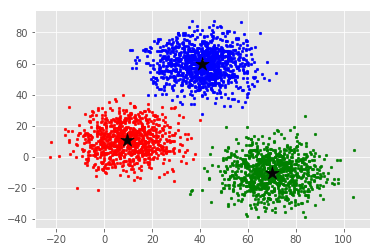

<Figure size 1152x648 with 0 Axes>

In [68]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = pt.subplots()
#D
pt.figure(figsize=(16,9))
for i in range(k):
        points = np.array([A[j] for j in range(len(A)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')